In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('D:\GTSRB Data')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Store data,labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'D:\\GTSRB Data'

Preprocess the images

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

Converting lists into numpy arrays

In [6]:
data = np.array(data)
labels = np.array(labels)

Save Labels & Data for future use

In [7]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

Load data & Labels

In [8]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Converting labels to onehot encoding

In [19]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test,43)

build the model

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

Compilation of the model

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.3491 - loss: 3.0115 - val_accuracy: 0.9189 - val_loss: 0.3469
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8694 - loss: 0.4879 - val_accuracy: 0.9638 - val_loss: 0.1361
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9166 - loss: 0.2994 - val_accuracy: 0.9783 - val_loss: 0.0801
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9288 - loss: 0.2658 - val_accuracy: 0.9768 - val_loss: 0.0903
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.9424 - loss: 0.2213 - val_accuracy: 0.9807 - val_loss: 0.0786
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9451 - loss: 0.2030 - val_accuracy: 0.9799 - val_loss: 0.0754
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9498 - loss: 0.2020 - val_accuracy: 0.9898 - val_loss: 0.0403
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9507 - loss: 0.1930 - 

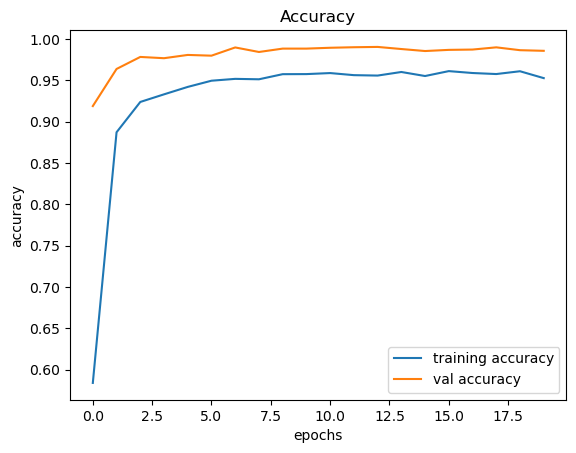

In [23]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


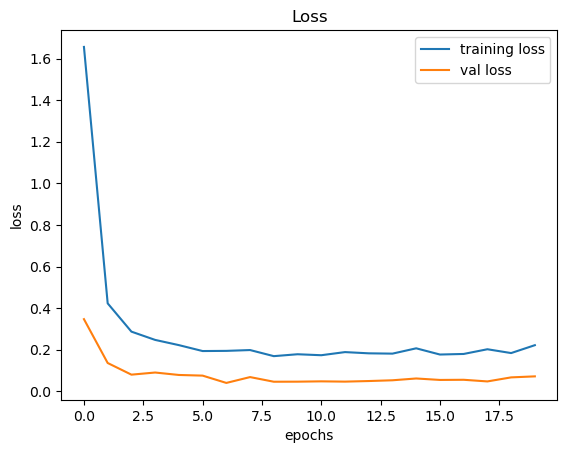

In [24]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [29]:
X_test, label = testing('Test.csv')

In [30]:
# Predict the labels for test data
Y_pred_prob = model.predict(X_test)  # Predict probabilities
Y_pred = np.argmax(Y_pred_prob, axis=1)  # Convert probabilities to class labels

Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([16,  1, 38, ..., 15,  7, 10], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9560570071258907


save the model

In [32]:
model.save("./training/TSR.h5")

Load the model

In [33]:
import os
os.chdir('D:\GTSRB Data')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [34]:

# Assuming you have a dictionary or list called classes to map the predicted label to the traffic sign name
classes = {
    0: 'Speed limit (20km/h)', 
    1: 'Speed limit (30km/h)', 
    2: 'Speed limit (50km/h)', 
    3: 'Speed limit (60km/h)', 
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}



In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred_prob = model.predict(X_test)  # Predict probabilities
    Y_pred = np.argmax(Y_pred_prob, axis=1)  # Convert probabilities to class labels
    return image, Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted traffic sign is:  Speed limit (70km/h)


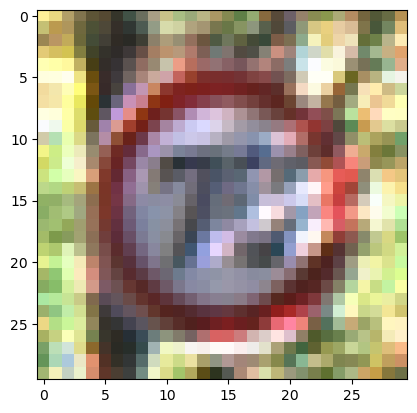

In [37]:
plot, prediction = test_on_img(r'D:\GTSRB Data\Test\00014.png')
predicted_class = prediction[0]
print("Predicted traffic sign is: ", classes[predicted_class])
plt.imshow(plot)
plt.show()